In [ ]:
# manipulacja danymi
import numpy as np
import pandas as pd

# wizualizacja danych
import matplotlib.pyplot as plt
import seaborn as sns

# statystyczna analiza danych
from scipy import stats

# przygotowanie danych
from sklearn.preprocessing import StandardScaler, MinMaxScaler
dataset = pd.read_csv('titanic.csv')
dataset

Sprawdzam ile wierszy z wartością w kolumnie Fare nie jest pustych.

In [2]:
fare_values = dataset.loc[dataset['Fare'].notnull(), 'Fare'].values
print(fare_values.shape)

(891,)


Tworzę histogram, aby zobaczyć jak rozkładają się wysokości opłat.

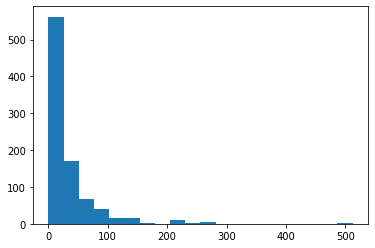

In [11]:
plt.hist(fare_values, bins=20)
plt.show()

Obliczam średnią opłatę za rejs.

In [7]:
mean_fare = np.round(np.mean(fare_values))
print(mean_fare)

32.0


Średni koszt bilety wyniósł 32.0 funtów.

Na histogramie wygląda to tak:

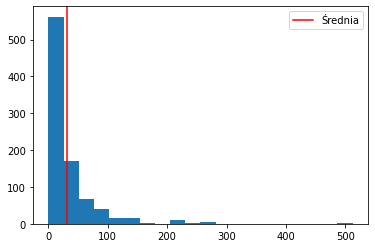

In [10]:
plt.hist(fare_values, bins=20)
plt.axvline(x = mean_fare, color='red', label = 'Średnia')
plt.legend(loc='upper right')
plt.show()

Mediana

In [12]:
median_fare = np.median(fare_values)
print(median_fare)

14.4542


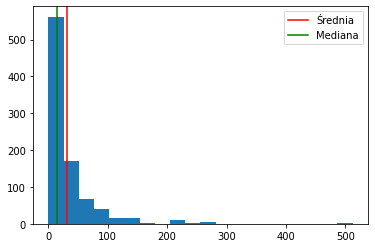

In [13]:
plt.hist(fare_values, bins=20)
plt.axvline(x = mean_fare, color='red', label = 'Średnia')
plt.axvline(x = median_fare, color='green', label = 'Mediana')
plt.legend(loc='upper right')
plt.show()

Jak widzimy mediana jest przesunięta znacząco w lewo względem średniej.

Moda

In [14]:
mode_fare = stats.mode(fare_values)
print(mode_fare)

ModeResult(mode=array([8.05]), count=array([43]))


C:\Users\Marcin\AppData\Local\Temp\ipykernel_9044\348530861.py:1: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_fare = stats.mode(fare_values)


Najczęściej występyjąca cena biletu wyniosła 8.05 funtów, a było ich 43.

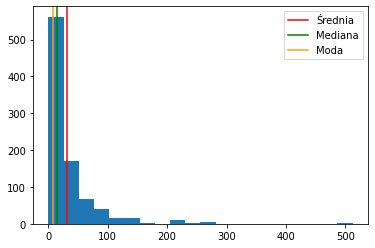

In [15]:
plt.hist(fare_values, bins=20)
plt.axvline(x = mean_fare, color='red', label = 'Średnia')
plt.axvline(x = median_fare, color='green', label = 'Mediana')
plt.axvline(x = mode_fare[0], color='orange', label = 'Moda')
plt.legend(loc='upper right')
plt.show()

Kwartyle

In [16]:
q0 = np.quantile(fare_values, 0.0)
q1 = np.round(np.quantile(fare_values, 0.25))
q3 = np.round(np.quantile(fare_values, 0.75))
q4 = np.round(np.quantile(fare_values, 1.0))
print(f'Q0: {q0}')
print(f'Q1: {q1}')
print(f'Q2: {median_fare}')
print(f'Q3: {q3}')
print(f'Q4: {q4}')

Q0: 0.0
Q1: 8.0
Q2: 14.4542
Q3: 31.0
Q4: 512.0


Wynika z tego, że 75% pasażerów zapłaciła za rejs nie więcej niż 31 funtów.

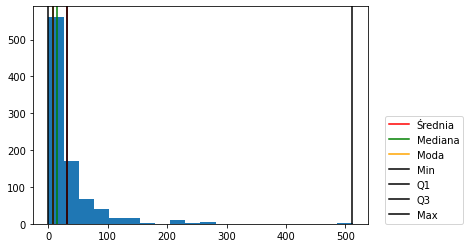

In [19]:
plt.hist(fare_values, bins=20)
plt.axvline(x = mean_fare, color='red', label = 'Średnia')
plt.axvline(x = median_fare, color='green', label = 'Mediana')
plt.axvline(x = mode_fare[0], color='orange', label = 'Moda')
plt.axvline(x = q0, color='black', label = 'Min')
plt.axvline(x = q1, color='black', label = 'Q1')
plt.axvline(x = q3, color='black', label = 'Q3')
plt.axvline(x = q4, color='black', label = 'Max')
plt.legend(loc=(1.05,0.0))
plt.show()

Zakres

In [20]:
range_fare = max(fare_values) - min(fare_values)
print(range_fare)

512.3292


W tym wypadku nie musieliśmy podsatwiać do wzoru, ponieważ już po kwartylach 0 i 4 widać, że różnica jest równa wartości kwartyla czwartego.

Rozstęp międzykwartylowy - IQR

In [21]:
iqr = q3 - q1
print(iqr)

23.0


Stwórzmy wykres pudełkowy dla zmiennej 'opłata'.

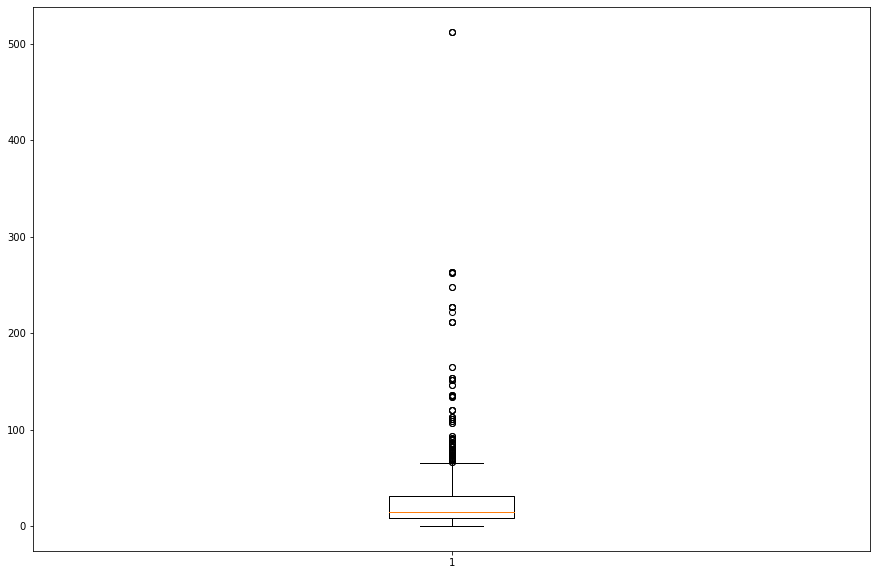

In [23]:
plt.figure(figsize=(15,10))
plt.boxplot(fare_values)
plt.show()

Większość opłat za rejs znajduje się w przedziale od 0 do 60.

Wariancja

In [24]:
variance_fare = np.var(fare_values, ddof=1)
print(variance_fare)

2469.436845743116


Odchylenie standardowe

In [25]:
standard_deviation_fare = np.std(fare_values, ddof=1)
print(standard_deviation_fare)

49.6934285971809


Skalowanie zmiennej

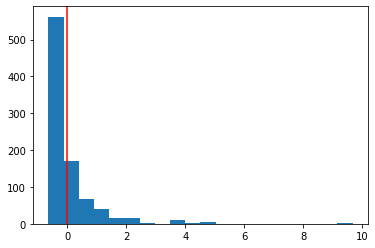

Średnia: 3.987332972840069e-18
Odchylenie standardowe: 1.0005616400330457


In [26]:
scaler_standardized = StandardScaler()
standardized_fare_values = scaler_standardized.fit_transform(fare_values.reshape(-1, 1))
plt.hist(standardized_fare_values, bins=20)
plt.axvline(x = standardized_fare_values.mean(), color='red', label = 'Średnia')
plt.show()
print(f'Średnia: {standardized_fare_values.mean()}')
print(f'Odchylenie standardowe: {np.std(standardized_fare_values, ddof=1)}')

Min Max Scaler

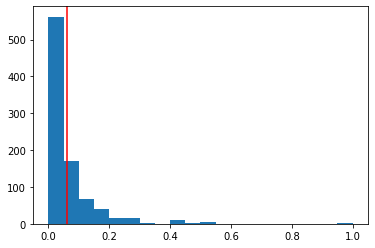

Średnia: 0.06285842768394742
Odchylenie standardowe: 0.09699511290236998


In [27]:
scaler_MinMax = MinMaxScaler()
normalized_fare_values = scaler_MinMax.fit_transform(fare_values.reshape(-1, 1))
plt.hist(normalized_fare_values, bins=20)
plt.axvline(x = normalized_fare_values.mean(), color='red', label = 'Średnia')
plt.show()
print(f'Średnia: {normalized_fare_values.mean()}')
print(f'Odchylenie standardowe: {np.std(normalized_fare_values, ddof=1)}')

Korelacja

Sprawdzamy czy istnieje korealcja między opłatą a klasą w jakiej podróżował pasażer.

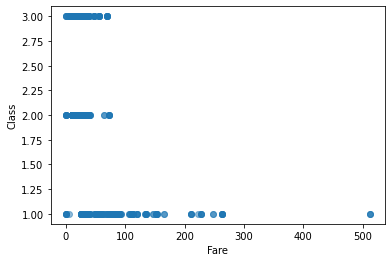

In [31]:
pclass_values = dataset.loc[dataset['Pclass'].notnull(), 'Pclass'].values
plt.scatter(x=fare_values, y=pclass_values, alpha=0.5)
plt.xlabel('Fare')
plt.ylabel('Class')
plt.show()

In [32]:
stats.pearsonr(fare_values, pclass_values)

PearsonRResult(statistic=-0.5494996199439078, pvalue=1.967386173420501e-71)

Korelacja pomiędzy opłatą a klasą w jakiej podróżował parażej wynosi około -0.55.